In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 186MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 28.4MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 91.7MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data.targets.shape

torch.Size([60000])

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True , num_workers=1)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, num_workers=1)

In [11]:
train_dataloader

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32 , 5 , 1)
        self.conv2 = nn.Conv2d(32,64 , 5 , 1)
        self.conv2_dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(64*4*4 , 512)
        self.fc2 = nn.Linear(512 , 10)
    def forward(self , x):
      x = F.relu(F.max_pool2d(self.conv1(x) , 2))
      x = F.relu(F.max_pool2d(self.conv2_dropout(self.conv2(x)) , 2))
      x = torch.flatten(x , 1)
      x = F.relu(self.fc1(x))
      x = F.dropout(x , training=self.training)
      x = self.fc2(x)
      return F.softmax(x)


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

optimizer = optim.Adam(model.parameters() , lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx , (data , target) in enumerate(train_dataloader):
    data , target = data.to(device) , target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output , target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_dataloader.dataset)} ({100. * batch_idx / len(train_dataloader):.0f}%)]\tLoss: {loss.item():.6f}')


def test(epoch):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.inference_mode():
    for data , target in test_dataloader:
      data , target = data.to(device) , target.to(device)
      output = model(data)
      test_loss += loss_fn(output , target).item()
      pred = output.argmax(dim=1 , keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_dataloader.dataset)
    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_dataloader.dataset)} ({100. * correct / len(test_dataloader.dataset):.0f}%)\n')


In [15]:
for epoch in range(1,11):
  train(epoch)
  test(epoch)

<ipython-input-12-bf7d449f7152>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301492
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.094851
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.834525
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.678274
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.630203
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.580054
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.660994
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.621334
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.577582
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.571770
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.553281
Train Epoch: 1 [14080/60000 (23%)]	Loss: 1.530695
Train Epoch: 1 [15360/60000 (26%)]	Loss: 1.549547
Train Epoch: 1 [16640/60000 (28%)]	Loss: 1.503436
Train Epoch: 1 [17920/60000 (30%)]	Loss: 1.526267
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.580931
Train Epoch: 1 [20480/60000 (34%)]	Loss: 1.538683
Train Epoch: 1 [21760/60000 (36%)]	Loss: 1.529165
Train Epoch: 1 [23040/60000 (38%)]	Loss: 1.545196
Train Epoch: 1 [24320/60000 (41%)]	Loss: 1.542173
Train Epoch: 1 [

prediction {prediction}


<ipython-input-12-bf7d449f7152>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


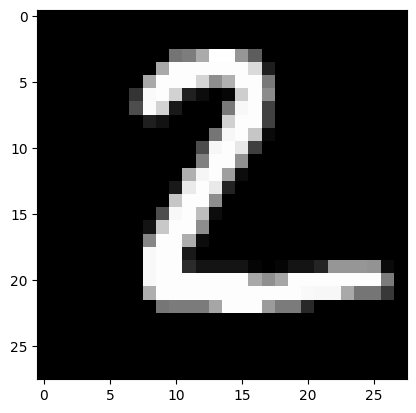

In [20]:
import matplotlib.pyplot as plt # Corrected the module name from 'mathplotlib' to 'matplotlib'
model.eval()
data , target = test_data[1]
data = data.unsqueeze(0).to(device)
# Changed 'ouput' to 'output' to fix the typo
output = model(data)
prediction = output.argmax(dim = 1 , keepdim = True)
print('prediction {prediction}')
# The issue is resolved by removing the first dimension using [0] before squeezing.
# data.cpu().squeeze(0) has shape (1, 28, 28)
# data.cpu()[0].squeeze(0) or data.cpu().squeeze(0)[0] will have shape (28, 28)
plt.imshow(data.cpu()[0].squeeze(0) , cmap = 'gray')
plt.show()